In [22]:
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
import plotly.express as px
import requests
import json

In [27]:
df = pd.read_excel(r"C:\Users\juand\OneDrive\Documentos\Proyecto Modelo Codigo\api-monitoreo-financiero\src\data\PIB2.xlsx", thousands= '.')
df.head()

,Año,Datos
0,2005,337958
1,2006,381604
2,2007,428506
3,2008,476554
4,2009,501574


In [28]:
df.shape

(18, 2)

In [29]:
df.isnull().sum() 

Año      0
Datos    0
dtype: int64

In [37]:
df['ds'] = pd.to_datetime(df['Año'], format='%Y')

In [64]:
px.line(df, x ='ds', y = 'Datos', title= "Producto Interno Bruto")

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [26]:

px.line(df, x ='ds', y = 'Valor', title= "Producto Interno Bruto")

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [38]:
print(df['ds'])

df['y'] = pd.to_numeric(df['Datos'])

0    2005-01-01
1    2006-01-01
2    2007-01-01
3    2008-01-01
4    2009-01-01
5    2010-01-01
6    2011-01-01
7    2012-01-01
8    2013-01-01
9    2014-01-01
10   2015-01-01
11   2016-01-01
12   2017-01-01
13   2018-01-01
14   2019-01-01
15   2020-01-01
16   2021-01-01
17   2022-01-01
Name: ds, dtype: datetime64[ns]


In [35]:
print(df)


     Año    Datos         ds        y
0   2005   337958 2005-01-01   337958
1   2006   381604 2006-01-01   381604
2   2007   428506 2007-01-01   428506
3   2008   476554 2008-01-01   476554
4   2009   501574 2009-01-01   501574
5   2010   544060 2010-01-01   544060
6   2011   619023 2011-01-01   619023
7   2012   666507 2012-01-01   666507
8   2013   714093 2013-01-01   714093
9   2014   762903 2014-01-01   762903
10  2015   804692 2015-01-01   804692
11  2016   863782 2016-01-01   863782
12  2017   920471 2017-01-01   920471
13  2018   987791 2018-01-01   987791
14  2019  1060068 2019-01-01  1060068
15  2020   997742 2020-01-01   997742
16  2021  1192586 2021-01-01  1192586
17  2022  1462522 2022-01-01  1462522


In [36]:
m = Prophet()
m.fit(df)

10:42:34 - cmdstanpy - INFO - Chain [1] start processing
10:42:34 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future = m.make_future_dataframe(periods=3, freq='A')
future.tail()

,ds
16,2021-01-01
17,2022-01-01
18,2022-12-31
19,2023-12-31
20,2024-12-31


In [62]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,3.018933e+05,2.248925e+05,3.850657e+05
1,2006-01-01,3.603820e+05,2.841249e+05,4.334086e+05
2,2007-01-01,4.006638e+05,3.168138e+05,4.767255e+05
3,2008-01-01,4.227597e+05,3.437430e+05,5.033654e+05
4,2009-01-01,5.242180e+05,4.447054e+05,6.027823e+05
5,2010-01-01,5.827067e+05,5.039912e+05,6.629683e+05
6,2011-01-01,6.229932e+05,5.414580e+05,7.007340e+05
7,2012-01-01,6.450939e+05,5.668355e+05,7.254774e+05
8,2013-01-01,7.465572e+05,6.626384e+05,8.207576e+05
9,2014-01-01,8.050899e+05,7.225721e+05,8.902706e+05


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



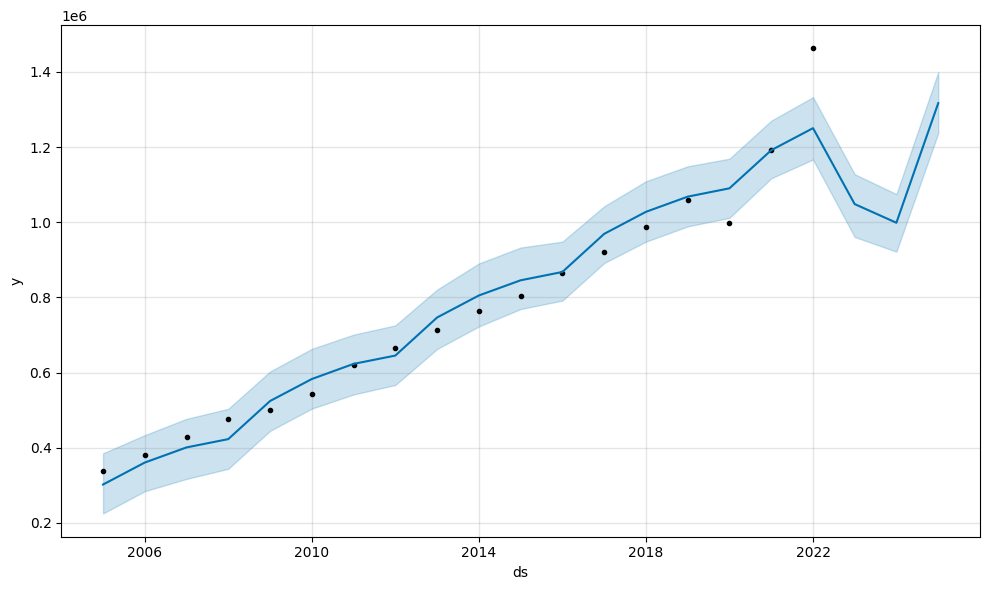

In [63]:
fig1=m.plot(forecast)